In [1]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

In [2]:
env = Maze()

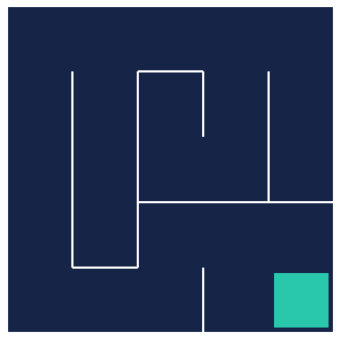

In [3]:
frame = env.render(mode='rgb_array')
plt.figure(figsize=(6, 6))
plt.axis('off')
plt.imshow(frame)

In [4]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


In [7]:
action_values = np.full((5,5,4),-100)
action_values[4,4,:] = 0

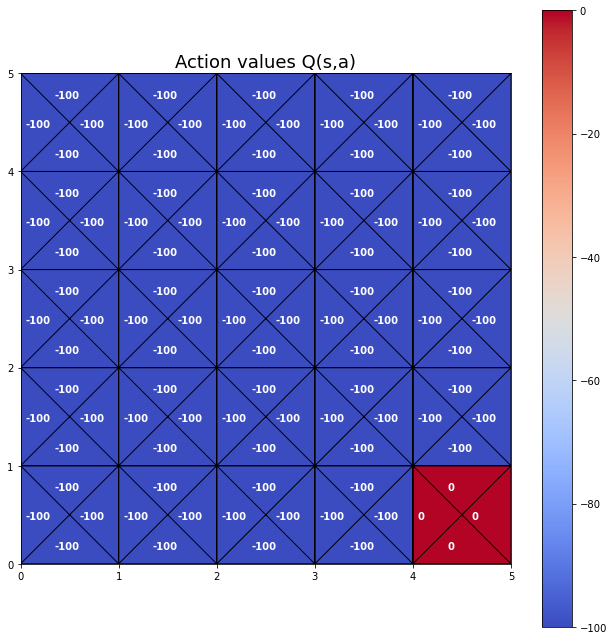

In [10]:
plot_action_values(action_values)

In [20]:
def target_policy(state):
    av = action_values[state]
    return np.random.choice(np.flatnonzero(av == av.max()))

In [25]:
action = target_policy((0,0))
action

1

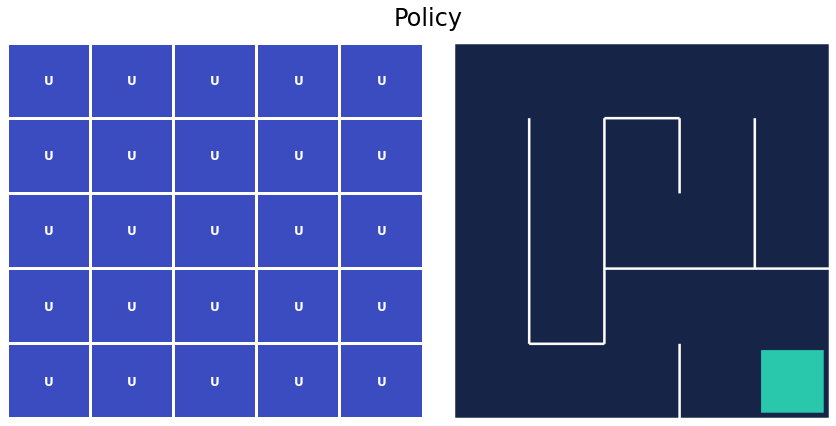

In [26]:
plot_policy(action_values, frame)

In [29]:
def exploratory_policy(state, epsilon=0):
    if np.random.random() < epsilon:
        return np.random.choice(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))    

In [71]:
action = exploratory_policy((0,0))
action

0

In [108]:
def off_policy_mc_control(action_values, target_policy, exploratory_policy, episodes, gamma=0.99, epsilon=0.2):
    csa = np.zeros((5,5,4))
    
    for episode in range(1, episodes+1):
        G=0
        W=1
        state = env.reset()
        done = False
        transitions = []
        
        while not done:
            action = exploratory_policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            transitions.append([state, action, reward])
            state = next_state
        
        for state_t, action_t, reward_t in reversed(transitions):
            G = reward_t + gamma*G
            csa[state_t][action_t] += W
            qsa = action_values[state_t][action_t]
            action_values[state_t][action_t] += (W/csa[state_t][action_t])*(G-qsa)
            
            if action_t != target_policy(state_t):
                break
            
            W = W*1./(1-epsilon + epsilon/4)           

In [112]:
off_policy_mc_control(action_values, target_policy, exploratory_policy, episodes=100, epsilon=0.3)

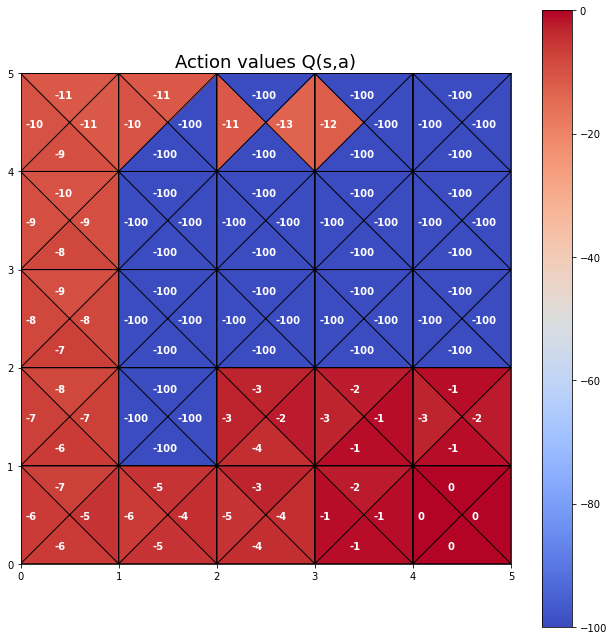

In [113]:
plot_action_values(action_values)

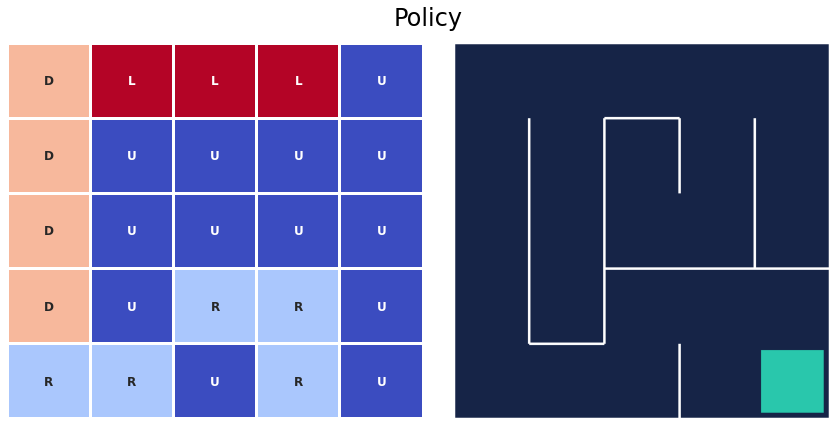

In [111]:
plot_policy(action_values, frame)

In [ ]:
test_agent(env, target_policy)